In [ ]:
!pip install scikit-learn-extra

KMeans Clustering:
n_clusters=3, Silhouette Score=0.41

KMedoids Clustering:
n_clusters=3, Silhouette Score=0.41


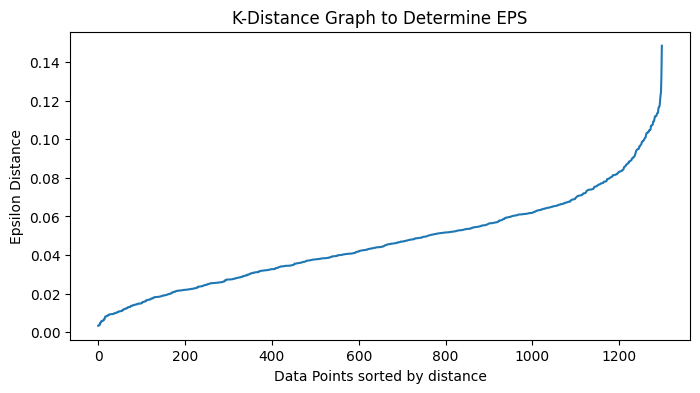


DBSCAN Grid Search:
eps=0.8, min_samples=5, Silhouette Score=Not Computed (Single Cluster)
eps=0.8, min_samples=8, Silhouette Score=Not Computed (Single Cluster)
eps=0.8, min_samples=10, Silhouette Score=Not Computed (Single Cluster)
eps=0.1, min_samples=5, Silhouette Score=0.04
eps=0.1, min_samples=8, Silhouette Score=-0.36
eps=0.1, min_samples=10, Silhouette Score=-0.52
eps=0.12, min_samples=5, Silhouette Score=-0.05
eps=0.12, min_samples=8, Silhouette Score=-0.12
eps=0.12, min_samples=10, Silhouette Score=-0.35
eps=0.14, min_samples=5, Silhouette Score=-0.07
eps=0.14, min_samples=8, Silhouette Score=-0.04
eps=0.14, min_samples=10, Silhouette Score=-0.06
eps=0.2, min_samples=5, Silhouette Score=Not Computed (Single Cluster)
eps=0.2, min_samples=8, Silhouette Score=Not Computed (Single Cluster)
eps=0.2, min_samples=10, Silhouette Score=-0.15
eps=0.3, min_samples=5, Silhouette Score=Not Computed (Single Cluster)
eps=0.3, min_samples=8, Silhouette Score=Not Computed (Single Cluster)
ep

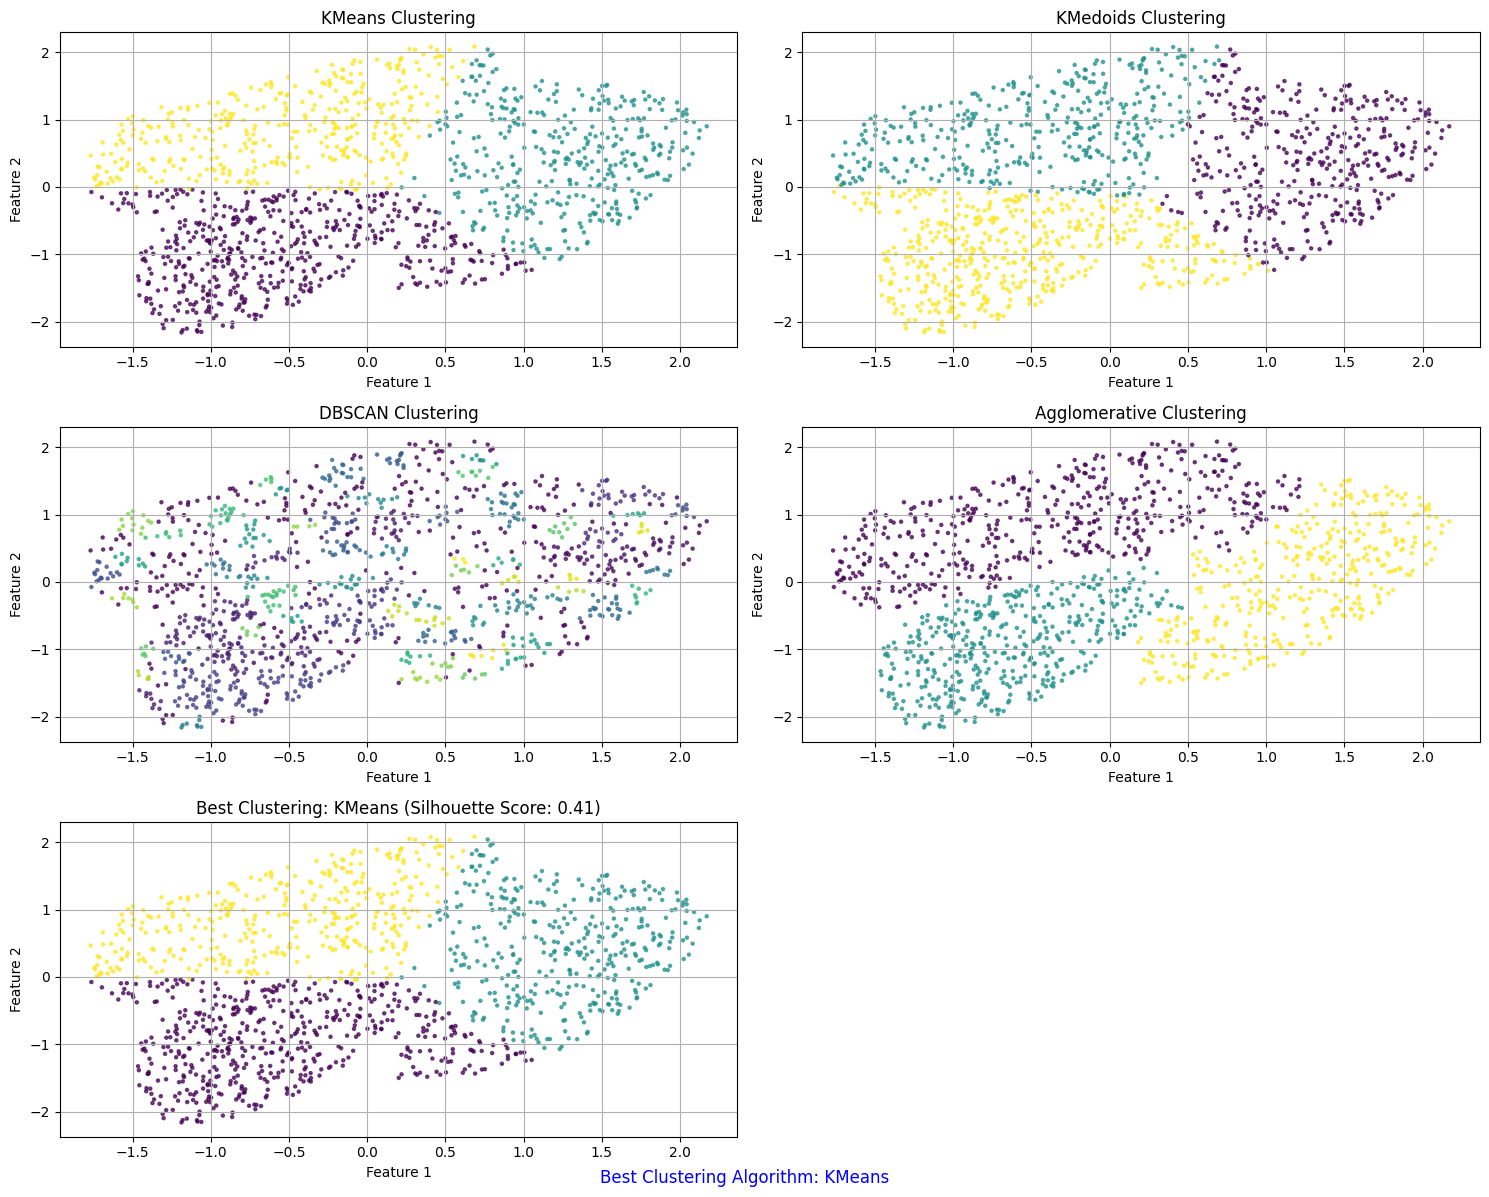

Best Clustering: KMeans with Silhouette Score: 0.41
Clustering completed and labels saved to 'cluster_labels.txt'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

data = pd.read_csv('data.csv')


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


print("KMeans Clustering:")
kmeans = KMeans(n_clusters=3, random_state=42)  # Specify desired n_clusters
kmeans_labels = kmeans.fit_predict(data_scaled)
kmeans_score = silhouette_score(data_scaled, kmeans_labels)
print(f"n_clusters=3, Silhouette Score={kmeans_score:.2f}")


print("\nKMedoids Clustering:")
kmedoids = KMedoids(n_clusters=3, random_state=42)  # Specify desired n_clusters
kmedoids_labels = kmedoids.fit_predict(data_scaled)
kmedoids_score = silhouette_score(data_scaled, kmedoids_labels)
print(f"n_clusters=3, Silhouette Score={kmedoids_score:.2f}")


neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('K-Distance Graph to Determine EPS')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon Distance')
plt.show()


print("\nDBSCAN Grid Search:")
dbscan_params = {'eps': [0.8, 0.1, 0.12, 0.14, 0.2, 0.3], 'min_samples': [5, 8, 10]}
dbscan_best_score = -1
dbscan_best_labels = None
for eps in dbscan_params['eps']:
    for min_samples in dbscan_params['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_scaled)
        if len(set(labels)) > 1:
            score = silhouette_score(data_scaled, labels)
            print(f"eps={eps}, min_samples={min_samples}, Silhouette Score={score:.2f}")
            if score > dbscan_best_score:
                dbscan_best_score = score
                dbscan_best_labels = labels
        else:
            print(f"eps={eps}, min_samples={min_samples}, Silhouette Score=Not Computed (Single Cluster)")


print("\nAgglomerative Clustering:")
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data_scaled)
agglo_score = silhouette_score(data_scaled, agglo_labels)
print(f"n_clusters=3, Silhouette Score={agglo_score:.2f}")


clustering_results = [
    ("KMeans", kmeans_score, kmeans_labels),
    ("KMedoids", kmedoids_score, kmedoids_labels),
    ("DBSCAN", dbscan_best_score, dbscan_best_labels),
    ("Agglomerative", agglo_score, agglo_labels),
]
best_name, best_score, best_labels = max(clustering_results, key=lambda x: x[1])

print("\nFinal Silhouette Scores:")
print(f"KMeans: {kmeans_score:.2f}")
print(f"KMedoids: {kmedoids_score:.2f}")
print(f"DBSCAN: {dbscan_best_score:.2f}")
print(f"Agglomerative: {agglo_score:.2f}")


plt.figure(figsize=(15, 12))


algorithms = [
    ("KMeans", kmeans_labels),
    ("KMedoids", kmedoids_labels),
    ("DBSCAN", dbscan_best_labels),
    ("Agglomerative", agglo_labels),
]


for i, (name, labels) in enumerate(algorithms, start=1):
    plt.subplot(3, 2, i)
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', s=5, alpha=0.7)
    plt.title(f"{name} Clustering")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)


plt.subplot(3, 2, 5)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=best_labels, cmap='viridis', s=5, alpha=0.7)
plt.title(f"Best Clustering: {best_name} (Silhouette Score: {best_score:.2f})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)


plt.figtext(0.5, 0.01, f"Best Clustering Algorithm: {best_name}", ha="center", fontsize=12, color="blue")

plt.tight_layout()
plt.show()

np.savetxt('clusters.csv', agglo_labels, header='Cluster', comments='')

print(f"Best Clustering: {best_name} with Silhouette Score: {best_score:.2f}")
print("Clustering completed and labels saved to 'cluster_labels.txt'")


silhoutte score is higher in kmeans but both the score in all clutsering is less and agglomerative has better visualisation of clusters and nearly same silhoute score as kmeans .

Exploring PCA

KMeans Clustering:
n_clusters=3, Silhouette Score=0.41

KMedoids Clustering:
n_clusters=3, Silhouette Score=0.41


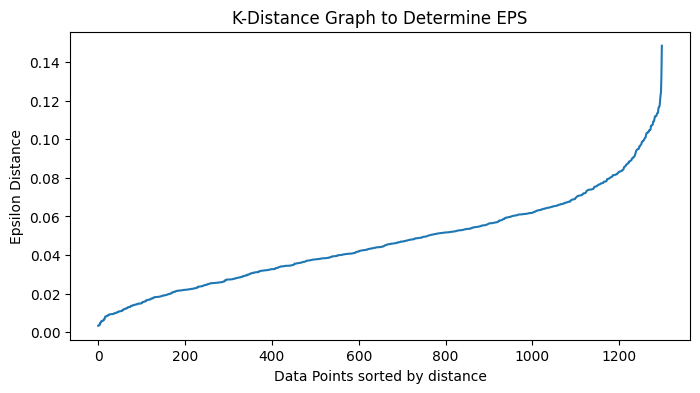


DBSCAN Grid Search:
eps=0.8, min_samples=5, Silhouette Score=Not Computed (Single Cluster)
eps=0.8, min_samples=8, Silhouette Score=Not Computed (Single Cluster)
eps=0.8, min_samples=10, Silhouette Score=Not Computed (Single Cluster)
eps=0.1, min_samples=5, Silhouette Score=0.04
eps=0.1, min_samples=8, Silhouette Score=-0.36
eps=0.1, min_samples=10, Silhouette Score=-0.52
eps=0.12, min_samples=5, Silhouette Score=-0.05
eps=0.12, min_samples=8, Silhouette Score=-0.12
eps=0.12, min_samples=10, Silhouette Score=-0.35
eps=0.14, min_samples=5, Silhouette Score=-0.07
eps=0.14, min_samples=8, Silhouette Score=-0.04
eps=0.14, min_samples=10, Silhouette Score=-0.06
eps=0.2, min_samples=5, Silhouette Score=Not Computed (Single Cluster)
eps=0.2, min_samples=8, Silhouette Score=Not Computed (Single Cluster)
eps=0.2, min_samples=10, Silhouette Score=-0.15
eps=0.3, min_samples=5, Silhouette Score=Not Computed (Single Cluster)
eps=0.3, min_samples=8, Silhouette Score=Not Computed (Single Cluster)
ep

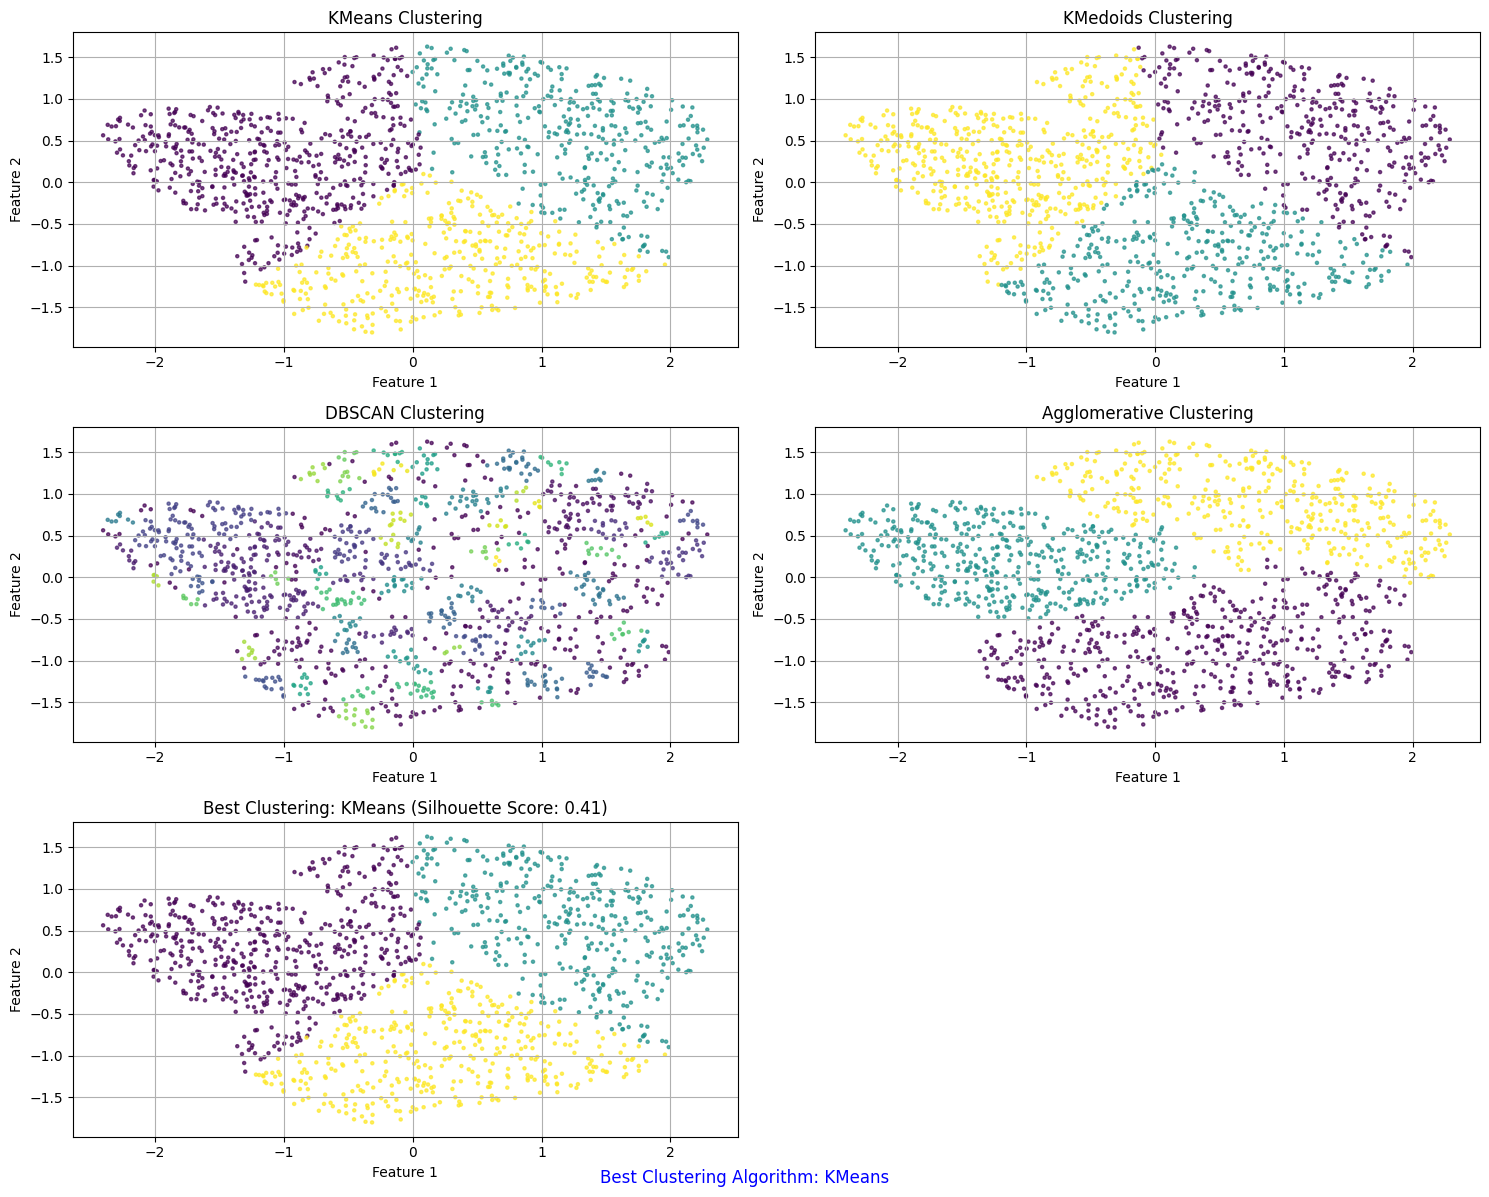

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors


data = pd.read_csv('data.csv')


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)


print("KMeans Clustering:")
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)
kmeans_score = silhouette_score(data_pca, kmeans_labels)
print(f"n_clusters=3, Silhouette Score={kmeans_score:.2f}")

print("\nKMedoids Clustering:")
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = kmedoids.fit_predict(data_pca)
kmedoids_score = silhouette_score(data_pca, kmedoids_labels)
print(f"n_clusters=3, Silhouette Score={kmedoids_score:.2f}")

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(data_pca)
distances, indices = neighbors_fit.kneighbors(data_pca)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('K-Distance Graph to Determine EPS')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon Distance')
plt.show()


print("\nDBSCAN Grid Search:")
dbscan_params = {'eps': [0.8, 0.1, 0.12, 0.14, 0.2, 0.3], 'min_samples': [5, 8, 10]}
dbscan_best_score = -1
dbscan_best_labels = None
for eps in dbscan_params['eps']:
    for min_samples in dbscan_params['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_pca)
        if len(set(labels)) > 1:
            score = silhouette_score(data_pca, labels)
            print(f"eps={eps}, min_samples={min_samples}, Silhouette Score={score:.2f}")
            if score > dbscan_best_score:
                dbscan_best_score = score
                dbscan_best_labels = labels
        else:
            print(f"eps={eps}, min_samples={min_samples}, Silhouette Score=Not Computed (Single Cluster)")


print("\nAgglomerative Clustering:")
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data_pca)
agglo_score = silhouette_score(data_pca, agglo_labels)
print(f"n_clusters=3, Silhouette Score={agglo_score:.2f}")


clustering_results = [
    ("KMeans", kmeans_score, kmeans_labels),
    ("KMedoids", kmedoids_score, kmedoids_labels),
    ("DBSCAN", dbscan_best_score, dbscan_best_labels),
    ("Agglomerative", agglo_score, agglo_labels),
]
best_name, best_score, best_labels = max(clustering_results, key=lambda x: x[1])

print("\nFinal Silhouette Scores:")
print(f"KMeans: {kmeans_score:.2f}")
print(f"KMedoids: {kmedoids_score:.2f}")
print(f"DBSCAN: {dbscan_best_score:.2f}")
print(f"Agglomerative: {agglo_score:.2f}")


plt.figure(figsize=(15, 12))


algorithms = [
    ("KMeans", kmeans_labels),
    ("KMedoids", kmedoids_labels),
    ("DBSCAN", dbscan_best_labels),
    ("Agglomerative", agglo_labels),
]


for i, (name, labels) in enumerate(algorithms, start=1):
    plt.subplot(3, 2, i)
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=5, alpha=0.7)
    plt.title(f"{name} Clustering")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)

plt.subplot(3, 2, 5)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=best_labels, cmap='viridis', s=5, alpha=0.7)
plt.title(f"Best Clustering: {best_name} (Silhouette Score: {best_score:.2f})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)


plt.figtext(0.5, 0.01, f"Best Clustering Algorithm: {best_name}", ha="center", fontsize=12, color="blue")

plt.tight_layout()
plt.show()


There was no significant change when i used PCA but since the number of features = 2 no need of PCA.